### imports
Raw data can be downloaded at 
http://popstats.unhcr.org/en/time_series

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx



pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

### Read in data and impute

In [2]:
df = pd.read_csv("../data/unhcr_popstats_export_time_series_all_data.csv",skiprows=3, encoding='latin-1')
df.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,"China, Hong Kong SAR",Various/Unknown,Refugees (incl. refugee-like situations),30000


In [3]:
# rename columns
df.columns = ["year", "destination", "origin","type", "value"]

# only looking at type "Refugees (incl. refugee-like situations)"
df = df[df["type"]=="Refugees (incl. refugee-like situations)"]

# impute *s
df.value = df.value.apply(lambda x:int(x) if x !="*" else np.random.randint(1,4))
df.value = df.value.astype(int)
#print(len(df)) # 102671
df.head()

,year,destination,origin,type,value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,"China, Hong Kong SAR",Various/Unknown,Refugees (incl. refugee-like situations),30000


In [4]:
# some country names were abbreviated causing issues when joining, fixing them here. 

df['origin'].replace("China, Hong Kong SAR", "Hong Kong SAR, China",inplace=True)
df['origin'].replace("Dem. People's Rep. of Korea", "Democratic People's Republic of Korea",inplace=True)
df['origin'].replace("Iran (Islamic Rep. of)", "Iran (Islamic Republic of)",inplace=True)
df['origin'].replace("China, Macao SAR", "Macao SAR, China",inplace=True)
df['origin'].replace("Czech Rep.", "Czech Republic",inplace=True)
df['origin'].replace("Rep. of Korea", "Republic of Korea",inplace=True)

df['origin'].replace("Central African Rep.", "Central African Republic",inplace=True)
df['origin'].replace("Tibetan", "China",inplace=True) ## No international country code for Tibet
df['origin'].replace("Lao People's Dem. Rep.", "Lao People's Democratic Republic",inplace=True)
df['origin'].replace("The former Yugoslav Rep. of Macedonia", "The former Yugoslav Republic of Macedonia",inplace=True)
df['origin'].replace("Dem. Rep. of the Congo", "Democratic Republic of the Congo",inplace=True)
df['origin'].replace("Palestinian", "Palestinian Territory, Occupied",inplace=True)

df['origin'].replace("Dominican Rep.", "Dominican Republic",inplace=True)
df['origin'].replace("Syrian Arab Rep.", "Syrian Arab Republic",inplace=True)
df['origin'].replace("Cabo Verde", "Cape Verde",inplace=True)
df['origin'].replace("United Rep. of Tanzania", "United Republic of Tanzania",inplace=True)
df['origin'].replace("Serbia and Kosovo: S/RES/1244 (1999)", "Serbia (and Kosovo: S/RES/1244 (1999))",inplace=True)
df['origin'].replace("Rep. of Moldova", "Republic of Moldova",inplace=True)

df['origin'].replace("Curaçao", "Curacao",inplace=True)
df['origin'].replace("United Kingdom", "United Kingdom of Great Britain and Northern Ireland",inplace=True)
df['origin'].replace("Serbia and Kosovo (S/RES/1244 (1999))", "Serbia (and Kosovo: S/RES/1244 (1999))",inplace=True)
df['origin'].replace("Bonaire", "Bonaire, Sint Eustatius and Saba",inplace=True)


df['origin'].replace("Guadeloupe", "France",inplace=True) # French Department
df['origin'].replace("American Samoa", "United States of America",inplace=True) #U.S. territory 
df['origin'].replace("Svalbard and Jan Mayen", "Norway",inplace=True) #under the full sovereignty of Norway
df['origin'].replace("Wallis and Futuna Islands ", "France",inplace=True) #French island 

df['origin'].replace("Norfolk Island", "Australia",inplace=True) # Australia's external territories. 
df['origin'].replace("Guam", "United States of America",inplace=True) # U.S. island territory 
df['origin'].replace("Saint-Pierre-et-Miquelon", "France",inplace=True) # French archipelago 
df['origin'].replace("Holy See (the)", "Holy See",inplace=True)


df['destination'].replace("The former Yugoslav Rep. of Macedonia", "The former Yugoslav Republic of Macedonia",inplace=True)
df['destination'].replace("USA (EOIR)", "United States of America",inplace=True)
df['destination'].replace("Serbia and Kosovo: S/RES/1244 (1999)", "Serbia (and Kosovo: S/RES/1244 (1999))",inplace=True)
df['destination'].replace("Rep. of Korea", "Republic of Korea",inplace=True)
df['destination'].replace("USA (INS/DHS)", "United States of America",inplace=True)
df['destination'].replace("Czech Rep.", "Czech Republic",inplace=True)

df['destination'].replace("China, Hong Kong SAR", "Hong Kong SAR, China",inplace=True)
df['destination'].replace("Dem. People's Rep. of Korea", "Democratic People's Republic of Korea",inplace=True)
df['destination'].replace("Iran (Islamic Rep. of)", "Iran (Islamic Republic of)",inplace=True)
df['destination'].replace("China, Macao SAR", "Macao SAR, China",inplace=True)
df['destination'].replace("Czech Rep.", "Czech Republic",inplace=True)
df['destination'].replace("Rep. of Korea", "Republic of Korea",inplace=True)

df['destination'].replace("Central African Rep.", "Central African Republic",inplace=True)
df['destination'].replace("Tibetan", "China",inplace=True) ## No international country code for Tibet
df['destination'].replace("Lao People's Dem. Rep.", "Lao People's Democratic Republic",inplace=True)
df['destination'].replace("The former Yugoslav Rep. of Macedonia", "The former Yugoslav Republic of Macedonia",inplace=True)
df['destination'].replace("Dem. Rep. of the Congo", "Democratic Republic of the Congo",inplace=True)
df['destination'].replace("Palestinian", "Palestinian Territory, Occupied",inplace=True)

df['destination'].replace("Dominican Rep.", "Dominican Republic",inplace=True)
df['destination'].replace("Syrian Arab Rep.", "Syrian Arab Republic",inplace=True)
df['destination'].replace("Cabo Verde", "Cape Verde",inplace=True)
df['destination'].replace("United Rep. of Tanzania", "United Republic of Tanzania",inplace=True)
df['destination'].replace("Serbia and Kosovo: S/RES/1244 (1999)", "Serbia (and Kosovo: S/RES/1244 (1999))",inplace=True)
df['destination'].replace("Rep. of Moldova", "Republic of Moldova",inplace=True)


df['destination'].replace("Curaçao", "Curacao",inplace=True)
df['destination'].replace("United Kingdom", "United Kingdom of Great Britain and Northern Ireland",inplace=True)
df['destination'].replace("Serbia and Kosovo (S/RES/1244 (1999))", "Serbia (and Kosovo: S/RES/1244 (1999))",inplace=True)
df['destination'].replace("Bonaire", "Bonaire, Sint Eustatius and Saba",inplace=True)



### Check with country_list.csv

In [5]:
# make sure you ran convert_to_country_list.py in /data already
df_cc = pd.read_csv("../data/country_list.csv")
#print(df_cc)
cc_names = set(df_cc.name_en)
print(len(cc_names)) #227




227


In [6]:
df_origin = set(df.origin)
#print(len(df_origin)) #205

missing_origin = []
for c in df_origin:
    if c in cc_names:
        pass
    else:
        missing_origin.append(c)


# check for country name mismatches        
print(missing_origin)

['Various/Unknown', 'Stateless']


In [7]:
df_destination = set(df.destination)
#print(len(df_destination)) #45

missing_destination = []
for c in df_destination:
    if c in cc_names:
        pass
    else:
        missing_destination.append(c)


# check for country name mismatches        
print(missing_destination)


['Various/Unknown']


In [8]:
# examine "Various/unknown" origin
df_unknown = df[df["origin"]=="Various/Unknown"]
#print(len(df_unknown)) #2986
#print(df_unknown["value"].sum()) #93372421
unknown_by_year = df_unknown.groupby(["destination", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(unknown_by_year)



                                            destination  year    value
1067                                            Germany  1993  1396000
1066                                            Germany  1992  1208000
1068                                            Germany  1994   984000
1069                                            Germany  1995   929100
1073                                            Germany  1999   925500
1070                                            Germany  1996   919000
1075                                            Germany  2001   879000
1074                                            Germany  2000   876000
1072                                            Germany  1998   849200
2881                                    Various/Unknown  1971   828000
1065                                            Germany  1991   793000
1071                                            Germany  1997   788000
1064                                            Germany  1990   784000
2885  

In [9]:
# examine "Stateless" origin

df_stateless = df[df["origin"]=="Stateless"]
#print(len(df_stateless)) #904
#print(df_stateless["value"].sum()) #824405
stateless_by_year = df_stateless.groupby(["destination", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(unknown_by_year)




                                            destination  year    value
1067                                            Germany  1993  1396000
1066                                            Germany  1992  1208000
1068                                            Germany  1994   984000
1069                                            Germany  1995   929100
1073                                            Germany  1999   925500
1070                                            Germany  1996   919000
1075                                            Germany  2001   879000
1074                                            Germany  2000   876000
1072                                            Germany  1998   849200
2881                                    Various/Unknown  1971   828000
1065                                            Germany  1991   793000
1071                                            Germany  1997   788000
1064                                            Germany  1990   784000
2885  

In [10]:
# examine "Various/unknown" destination
destination_unknown = df[df["destination"]=="Various/Unknown"]
#print(len(destination_unknown)) #55
#print(destination_unknown["value"].sum()) #9477655
d_unknown_by_year = destination_unknown.groupby(["origin", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(d_unknown_by_year)

# appears to be older records

               origin  year   value
29    Various/Unknown  1971  828000
33    Various/Unknown  1975  749120
30    Various/Unknown  1972  724720
32    Various/Unknown  1974  622490
44    Various/Unknown  1986  605400
34    Various/Unknown  1976  603300
31    Various/Unknown  1973  578750
45    Various/Unknown  1987  459400
23    Various/Unknown  1965  262000
25    Various/Unknown  1967  180050
13    Various/Unknown  1955  170900
11    Various/Unknown  1953  168000
12    Various/Unknown  1954  168000
37    Various/Unknown  1979  167490
14    Various/Unknown  1956  167100
38    Various/Unknown  1980  165150
10    Various/Unknown  1952  165000
43    Various/Unknown  1985  164000
15    Various/Unknown  1957  159700
9     Various/Unknown  1951  158800
17    Various/Unknown  1959  154000
18    Various/Unknown  1960  152000
19    Various/Unknown  1961  147200
16    Various/Unknown  1958  144000
36    Various/Unknown  1978  142840
20    Various/Unknown  1962  142300
26    Various/Unknown  1968 

### merge with country list

In [11]:
# merging with country_list.csv
df = df.merge(df_cc,how='left',left_on="origin",right_on="name_en")
df.rename(columns=dict(zip(df_cc.columns,[c+"_origin" for c in df_cc.columns])),inplace=True)

df = df.merge(df_cc,how='left',left_on="destination",right_on="name_en")
df.rename(columns=dict(zip(df_cc.columns,[c+"_destination" for c in df_cc.columns])),inplace=True)

df.head()
#print(len(df)) # 116205

,year,destination,origin,type,value,country_code_origin,name_en_origin,region_code_origin,region_code_en_origin,country_code_destination,name_en_destination,region_code_destination,region_code_en_destination
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000,NaN,NaN,NaN,NaN,AUL,Australia,9.0,Oceania
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000,NaN,NaN,NaN,NaN,AUS,Austria,150.0,Europe
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000,NaN,NaN,NaN,NaN,BEL,Belgium,150.0,Europe
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511,NaN,NaN,NaN,NaN,CAN,Canada,21.0,Northern America
4,1951,"Hong Kong SAR, China",Various/Unknown,Refugees (incl. refugee-like situations),30000,NaN,NaN,NaN,NaN,HKG,"Hong Kong SAR, China",142.0,Asia


### Where refugees come from

In [12]:
# overall historical total
outflows = df.groupby(["origin"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(outflows)



                                                origin      value
0                                          Afghanistan  131621423
203                                    Various/Unknown   93753500
176                                              Sudan   34091338
62                                            Ethiopia   32892175
89                                                Iraq   26895602
181                               Syrian Arab Republic   24070841
170                                            Somalia   20000550
4                                               Angola   17715963
205                                           Viet Nam   15299375
154                                             Rwanda   15033996
60                                             Eritrea   14695985
29                                             Burundi   13034223
51                    Democratic Republic of the Congo   11861345
38                                               China    9484158
125       

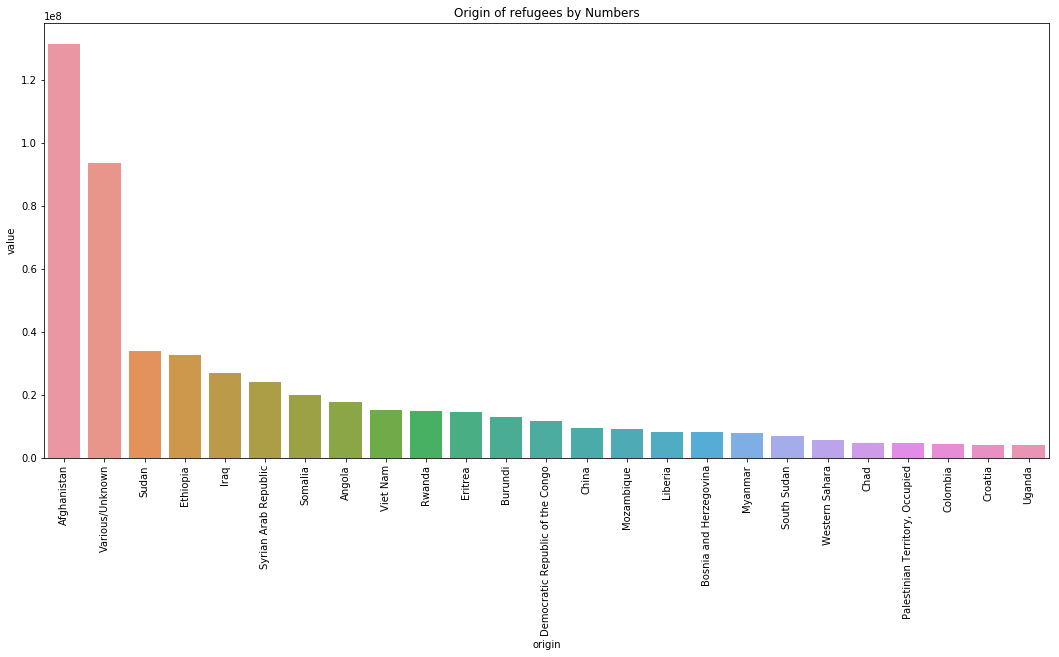

In [13]:
outflows_graph = outflows.head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(outflows_graph.origin, outflows_graph.value);
plt.title("Origin of refugees by Numbers");
plt.xticks(rotation='vertical');
plt.show();




In [14]:
# break down by year
outflows_by_year = df.groupby(["origin", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(outflows_by_year)

                                                 origin  year    value
11                                          Afghanistan  1990  6339095
5433                               Syrian Arab Republic  2017  6319902
12                                          Afghanistan  1991  6306301
10                                          Afghanistan  1989  5643989
9                                           Afghanistan  1988  5622982
5432                               Syrian Arab Republic  2016  5531374
8                                           Afghanistan  1987  5511740
7                                           Afghanistan  1986  5094283
5431                               Syrian Arab Republic  2015  4875935
4                                           Afghanistan  1983  4712735
6                                           Afghanistan  1985  4653193
13                                          Afghanistan  1992  4552153
3                                           Afghanistan  1982  4488214
5     

In [15]:
# past 5 years
outflows_by_year_recent = outflows_by_year[outflows_by_year['year']>=2014]
print(outflows_by_year_recent)

                                                 origin  year    value
5433                               Syrian Arab Republic  2017  6319902
5432                               Syrian Arab Republic  2016  5531374
5431                               Syrian Arab Republic  2015  4875935
5430                               Syrian Arab Republic  2014  3888288
5125                                        South Sudan  2017  3212629
36                                          Afghanistan  2015  2666311
38                                          Afghanistan  2017  2624269
35                                          Afghanistan  2014  2596270
37                                          Afghanistan  2016  2501451
5124                                        South Sudan  2016  1733887
5290                                              Sudan  2017  1389136
5287                                              Sudan  2014  1331934
5289                                              Sudan  2016  1301280
5288  

## Where refugees  go

In [16]:
# historical overall

inflows = df.groupby(["destination"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(inflows)
#df.head()

                                           destination     value
127                                           Pakistan  72520923
81                          Iran (Islamic Republic of)  67928797
160                                              Sudan  40394482
182                           United States of America  32470277
66                                             Germany  31130484
48                    Democratic Republic of the Congo  24800390
177                                             Uganda  15766288
181                        United Republic of Tanzania  15706318
58                                            Ethiopia  15406955
61                                              France  12940571
174                                             Turkey  11702500
155                                            Somalia  11549490
37                                               China  11348339
180  United Kingdom of Great Britain and Northern I...  10822636
90                       

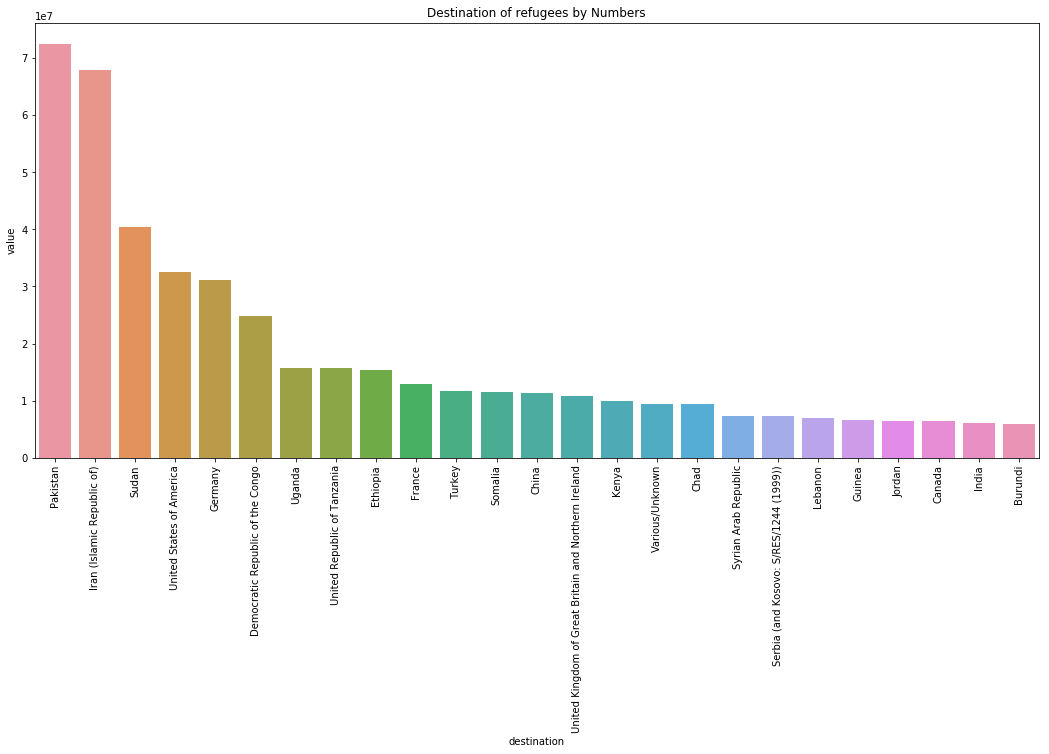

In [17]:
inflows_graph = inflows.head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(inflows_graph.destination, inflows_graph.value);
plt.title("Destination of refugees by Numbers");
plt.xticks(rotation='vertical');
plt.show();

In [18]:
# break down destination by year
inflows_by_year = df.groupby(["destination", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(inflows_by_year)

                                 destination  year    value
2673              Iran (Islamic Republic of)  1991  4404995
2672              Iran (Islamic Republic of)  1990  4174401
2674              Iran (Islamic Republic of)  1992  4150723
5638                                  Turkey  2017  3480625
4133                                Pakistan  1989  3275715
4132                                Pakistan  1988  3257577
4134                                Pakistan  1990  3255975
4131                                Pakistan  1987  3159000
4135                                Pakistan  1991  3099891
4127                                Pakistan  1983  2901360
4130                                Pakistan  1986  2882100
4126                                Pakistan  1982  2877480
5637                                  Turkey  2016  2869690
2671              Iran (Islamic Republic of)  1989  2850000
2670              Iran (Islamic Republic of)  1988  2850000
2669              Iran (Islamic Republic

In [19]:
# past 5 years
inflows_by_year_recent = inflows_by_year[inflows_by_year['year']>=2014]
print(inflows_by_year_recent)

                                            destination  year    value
5638                                             Turkey  2017  3480625
5637                                             Turkey  2016  2869690
5636                                             Turkey  2015  2541614
5138                                              Sudan  2017  1813212
5635                                             Turkey  2014  1587592
4159                                           Pakistan  2015  1561164
4158                                           Pakistan  2014  1505527
4161                                           Pakistan  2017  1393150
5725                                             Uganda  2017  1352861
4160                                           Pakistan  2016  1352561
3169                                            Lebanon  2014  1154397
3170                                            Lebanon  2015  1071500
3171                                            Lebanon  2016  1013664
3172  

## refugees from-to plot

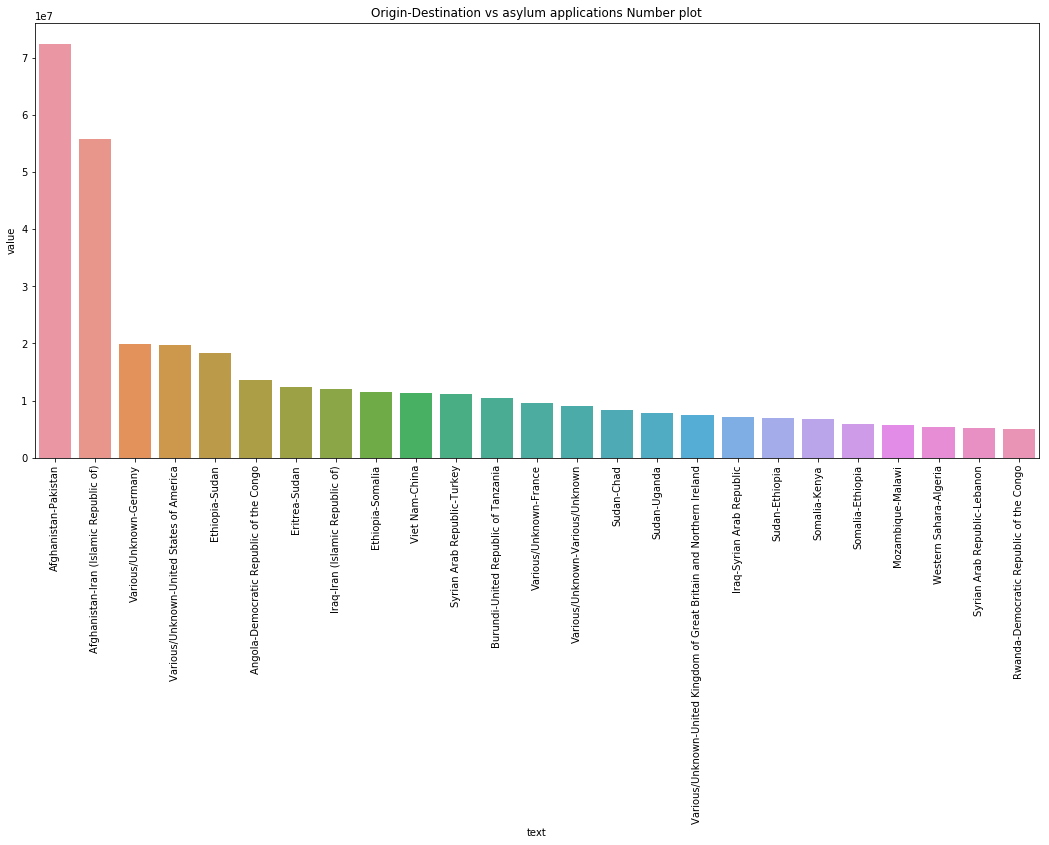

In [20]:
from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
#print(from_to_values)

from_to_values["text"] = from_to_values.apply(lambda row:row["origin"]+"-"+row["destination"],axis=1)
from_to_values = from_to_values.sort_values(["value"],ascending=False).head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(from_to_values.text, from_to_values.value);
plt.title("Origin-Destination vs asylum applications Number plot");
plt.xticks(rotation='vertical');
plt.show();



#### We now filter for data since 2016, and also filtering out "stateless" and "various/unknown" origin/destination. The resulting file will be used to draw our map. We plan to later merge data we have from other index files to this

In [22]:
df = df[df['year'] >= 2008]
df = df[df['destination'] != 'Various/Unknown']
df[~df['origin'].isin(['Various/Unknown', 'Stateless'])]

df.head()

,year,destination,origin,type,value,country_code_origin,name_en_origin,region_code_origin,region_code_en_origin,country_code_destination,name_en_destination,region_code_destination,region_code_en_destination
54080,2008,Afghanistan,Iran (Islamic Republic of),Refugees (incl. refugee-like situations),30,IRN,Iran (Islamic Republic of),142.0,Asia,AFG,Afghanistan,142.0,Asia
54081,2008,Afghanistan,Iraq,Refugees (incl. refugee-like situations),7,IRQ,Iraq,142.0,Asia,AFG,Afghanistan,142.0,Asia
54082,2008,Albania,Algeria,Refugees (incl. refugee-like situations),1,ALG,Algeria,2.0,Africa,ALB,Albania,150.0,Europe
54083,2008,Albania,China,Refugees (incl. refugee-like situations),4,CHI,China,142.0,Asia,ALB,Albania,150.0,Europe
54084,2008,Albania,Czech Republic,Refugees (incl. refugee-like situations),2,CZE,Czech Republic,150.0,Europe,ALB,Albania,150.0,Europe


In [23]:
df.to_csv('../data/unhcr_refugees_08-16.csv', encoding='utf-8', index=False)